In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
from pyspark.sql.types import StructField, StructType, IntegerType, StringType, BooleanType, DateType, DecimalType
from pyspark.sql.functions import col,when,sum,avg,row_number
from pyspark.sql.window import Window
from pyspark.sql.functions import year, month, dayofmonth, current_date, expr

In [0]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("IPL_Data_Analysis").getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.2 
 Master 
 local[8] 
 AppName 
 Databricks Shell

In [0]:
ball_by_ball_df = spark.read.format("csv").options(header = True, inferSchema= True).load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")


In [0]:
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+---+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+
|MatcH_id|Over_id|Ball_id|Innings_No|Team_Batting|Team_Bowling|Striker_Batting_Position|Extra_Type|Runs_Scored|Extra_runs|Wides|Legbyes|Byes|Noballs|Penalty|Bowler_Extras|      Out_type|Caught|Bowled|Run_out|LBW|Retired_hurt|Stumped|caught_and_bowled|hit_wicket|ObstructingFeild|Bowler_Wicket|Match_Date|Season|Striker|Non_Striker|Bowler|Player_Out|Fielders|Striker_match_SK|StrikerSK|NonStriker_match_SK|NONStriker_SK|Fielder_match_SK|Fi

In [0]:
ball_by_ball_schema = StructType([
    StructField("match_id", IntegerType(), True),
    StructField("over_id", IntegerType(), True),
    StructField("ball_id", IntegerType(), True),
    StructField("innings_no", IntegerType(), True),
    StructField("team_batting", StringType(), True),
    StructField("team_bowling", StringType(), True),
    StructField("striker_batting_position", IntegerType(), True),
    StructField("extra_type", StringType(), True),
    StructField("runs_scored", IntegerType(), True),
    StructField("extra_runs", IntegerType(), True),
    StructField("wides", IntegerType(), True),
    StructField("legbyes", IntegerType(), True),
    StructField("byes", IntegerType(), True),
    StructField("noballs", IntegerType(), True),
    StructField("penalty", IntegerType(), True),
    StructField("bowler_extras", IntegerType(), True),
    StructField("out_type", StringType(), True),
    StructField("caught", BooleanType(), True),
    StructField("bowled", BooleanType(), True),
    StructField("run_out", BooleanType(), True),
    StructField("lbw", BooleanType(), True),
    StructField("retired_hurt", BooleanType(), True),
    StructField("stumped", BooleanType(), True),
    StructField("caught_and_bowled", BooleanType(), True),
    StructField("hit_wicket", BooleanType(), True),
    StructField("obstructingfeild", BooleanType(), True),
    StructField("bowler_wicket", BooleanType(), True),
    StructField("match_date", DateType(), True),
    StructField("season", IntegerType(), True),
    StructField("striker", IntegerType(), True),
    StructField("non_striker", IntegerType(), True),
    StructField("bowler", IntegerType(), True),
    StructField("player_out", IntegerType(), True),
    StructField("fielders", IntegerType(), True),
    StructField("striker_match_sk", IntegerType(), True),
    StructField("strikersk", IntegerType(), True),
    StructField("nonstriker_match_sk", IntegerType(), True),
    StructField("nonstriker_sk", IntegerType(), True),
    StructField("fielder_match_sk", IntegerType(), True),
    StructField("fielder_sk", IntegerType(), True),
    StructField("bowler_match_sk", IntegerType(), True),
    StructField("bowler_sk", IntegerType(), True),
    StructField("playerout_match_sk", IntegerType(), True),
    StructField("battingteam_sk", IntegerType(), True),
    StructField("bowlingteam_sk", IntegerType(), True),
    StructField("keeper_catch", BooleanType(), True),
    StructField("player_out_sk", IntegerType(), True),
    StructField("matchdatesk", DateType(), True)
])

In [0]:
ball_by_ball_df= spark.read.schema(ball_by_ball_schema).format("csv").options(header = True).load("s3://ipl-data-analysis-project/Ball_By_Ball.csv")

In [0]:
match_schema = StructType([
    StructField("match_sk", IntegerType(), True),
    StructField("match_id", IntegerType(), True),
    StructField("team1", StringType(), True),
    StructField("team2", StringType(), True),
    StructField("match_date", DateType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("venue_name", StringType(), True),
    StructField("city_name", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("toss_winner", StringType(), True),
    StructField("match_winner", StringType(), True),
    StructField("toss_name", StringType(), True),
    StructField("win_type", StringType(), True),
    StructField("outcome_type", StringType(), True),
    StructField("manofmach", StringType(), True),
    StructField("win_margin", IntegerType(), True),
    StructField("country_id", IntegerType(), True)
])
match_df=spark.read.schema(match_schema).format("csv").options(header=True).load("s3://ipl-data-analysis-project/Match.csv")

In [0]:
player_schema = StructType([
    StructField("player_sk", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True)
])
player_df = spark.read.schema(player_schema).format("csv").options(header = True).load("s3://ipl-data-analysis-project/Player.csv")
     

In [0]:
player_match_schema = StructType([
    StructField("player_match_sk", IntegerType(), True),
    StructField("playermatch_key", DecimalType(10, 2), True),
    StructField("match_id", IntegerType(), True),
    StructField("player_id", IntegerType(), True),
    StructField("player_name", StringType(), True),
    StructField("dob", DateType(), True),
    StructField("batting_hand", StringType(), True),
    StructField("bowling_skill", StringType(), True),
    StructField("country_name", StringType(), True),
    StructField("role_desc", StringType(), True),
    StructField("player_team", StringType(), True),
    StructField("opposit_team", StringType(), True),
    StructField("season_year", IntegerType(), True),
    StructField("is_manofthematch", BooleanType(), True),
    StructField("age_as_on_match", IntegerType(), True),
    StructField("isplayers_team_won", BooleanType(), True),
    StructField("batting_status", StringType(), True),
    StructField("bowling_status", StringType(), True),
    StructField("player_captain", StringType(), True),
    StructField("opposit_captain", StringType(), True),
    StructField("player_keeper", StringType(), True),
    StructField("opposit_keeper", StringType(), True)
])
player_match_df = spark.read.schema(player_match_schema).format("csv").options(header = True).load("s3://ipl-data-analysis-project/Player_match.csv")
     

In [0]:
team_schema = StructType([
    StructField("team_sk", IntegerType(), True),
    StructField("team_id", IntegerType(), True),
    StructField("team_name", StringType(), True)
])
team_df = spark.read.schema(team_schema).format("csv").options(header = True).load("s3://ipl-data-analysis-project/Team.csv")
     

In [0]:
# Filter to include only valid deliveries(excluding extras like wides and no-balls for specific analysis)
ball_by_ball_df=ball_by_ball_df.filter((col("wides")==0) & (col("noballs")==0))

# Aggregation: Calculate the total and average runs scored in each match and inning
total_and_avg_runs= ball_by_ball_df.groupBy("match_id","innings_no").agg(
    sum("runs_scored").alias("total_runs"),
    avg("runs_scored").alias("average_runs")
)
total_and_avg_runs.show(5)

+--------+----------+----------+------------------+
|match_id|innings_no|total_runs|      average_runs|
+--------+----------+----------+------------------+
|  980940|         1|       138|              1.15|
|  419132|         1|       162|              1.35|
| 1082632|         2|       202|1.9238095238095239|
|  335993|         2|       131|1.6794871794871795|
| 1082617|         1|       123|1.0512820512820513|
+--------+----------+----------+------------------+
only showing top 5 rows



In [0]:
# Window function: Calculate running total of runs in each match for each over
windowSpec = Window.partitionBy("match_id","innings_no").orderBy("over_id")
ball_by_ball_df = ball_by_ball_df.withColumn(
    "running_total_runs",
    sum("runs_scored").over(windowSpec)
)
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|nonstriker_s

In [0]:
# Conditional Column: Flag for high impact balls (either a wicket or more than 6 runs including extras)
ball_by_ball_df= ball_by_ball_df.withColumn(
    "high_impact",
    when((col("runs_scored")+ col("extra_runs") >6) | (col("bowler_wicket")== True),True).otherwise(False)
)
ball_by_ball_df.show(5)

+--------+-------+-------+----------+------------+------------+------------------------+----------+-----------+----------+-----+-------+----+-------+-------+-------------+--------------+------+------+-------+----+------------+-------+-----------------+----------+----------------+-------------+----------+------+-------+-----------+------+----------+--------+----------------+---------+-------------------+-------------+----------------+----------+---------------+---------+------------------+--------------+--------------+------------+-------------+-----------+------------------+-----------+
|match_id|over_id|ball_id|innings_no|team_batting|team_bowling|striker_batting_position|extra_type|runs_scored|extra_runs|wides|legbyes|byes|noballs|penalty|bowler_extras|      out_type|caught|bowled|run_out| lbw|retired_hurt|stumped|caught_and_bowled|hit_wicket|obstructingfeild|bowler_wicket|match_date|season|striker|non_striker|bowler|player_out|fielders|striker_match_sk|strikersk|nonstriker_match_sk|

In [0]:
# Extracting year, month, and day from the match_date for more detailed time-based analysis
match_df= match_df.withColumn("year", year("match_date"))
match_df= match_df.withColumn("month", month("match_date"))
match_df= match_df.withColumn("day", dayofmonth("match_date"))

#High margin win: Categorizing win margins into 'high', 'medium' and 'low'
match_df= match_df.withColumn(
    "win-margin-category",
    when (col("win_margin")>=100, "High")
    .when ((col("win_margin")>=50) & (col("win_margin")<100), "Medium")
    .otherwise("Low")
)

# Analyze the impact of the toss: who wins the toss and the match
match_df= match_df.withColumn(
    "toss_impact",
    when(col("toss_winner")==col("match_winner"), "Yes").otherwise("No")
)

#Show the enhanced matched dataframe
match_df.show(5)

+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------+
|match_sk|match_id|               team1|               team2|match_date|season_year|          venue_name| city_name|country_name|         toss_winner|        match_winner|toss_name|win_type|outcome_type|  manofmach|win_margin|country_id|year|month| day|win-margin-category|toss_impact|
+--------+--------+--------------------+--------------------+----------+-----------+--------------------+----------+------------+--------------------+--------------------+---------+--------+------------+-----------+----------+----------+----+-----+----+-------------------+-----------+
|       0|  335987|Royal Challengers...|Kolkata Knight Ri...|      null|       2008|M Chinnaswamy Sta...| Bangalore|       India|Royal Challen

In [0]:
from pyspark.sql.functions import lower, regexp_replace
# Normalize and clean player names
player_df = player_df.withColumn("player_name", lower(regexp_replace("player_name", "[^a-zA-Z0-9 ]","")))

# Handle missing values in 'batting_hand' and 'bowling_skill' with a defalut unknown
player_df = player_df.fillna({"batting_hand": "unknown", "bowling_skill": "unknown"})

# categorizing players based on their batting hand
player_df = player_df.withColumn(
    "batting_category",
    when(lower(col("batting_hand")).contains("left"), "Left-Hand_batsman").otherwise("Right-Hand_Batsman")
)

# Show the modified player dataframe
player_df.show(5)

+---------+---------+---------------+----+--------------+------------------+------------+------------------+
|player_sk|player_id|    player_name| dob|  batting_hand|     bowling_skill|country_name|  batting_category|
+---------+---------+---------------+----+--------------+------------------+------------+------------------+
|        0|        1|     sc ganguly|null| Left-hand bat|  Right-arm medium|       India| Left-Hand_batsman|
|        1|        2|    bb mccullum|null|Right-hand bat|  Right-arm medium| New Zealand|Right-Hand_Batsman|
|        2|        3|     rt ponting|null|Right-hand bat|  Right-arm medium|   Australia|Right-Hand_Batsman|
|        3|        4|      dj hussey|null|Right-hand bat|Right-arm offbreak|   Australia|Right-Hand_Batsman|
|        4|        5|mohammad hafeez|null|Right-hand bat|Right-arm offbreak|    Pakistan|Right-Hand_Batsman|
+---------+---------+---------------+----+--------------+------------------+------------+------------------+
only showing top 5 

In [0]:

# Add a 'veteran_status' column based on player age
player_match_df = player_match_df.withColumn(
    "veteran_status",
    when(col("age_as_on_match")>=35, "veteran").otherwise("non-veteran")
)

# Dynamic column to calculate years since debut
player_match_df = player_match_df.withColumn(
    "years_since_debut", (year(current_date())- col("season_year"))
)

# Show the enriched dataframe
player_match_df.show(5)

+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+---------------+-------------+--------------+--------------+-----------------+
|player_match_sk|playermatch_key|match_id|player_id|player_name| dob|  batting_hand|       bowling_skill|country_name|role_desc|         player_team|        opposit_team|season_year|is_manofthematch|age_as_on_match|isplayers_team_won|batting_status|bowling_status|player_captain|opposit_captain|player_keeper|opposit_keeper|veteran_status|years_since_debut|
+---------------+---------------+--------+---------+-----------+----+--------------+--------------------+------------+---------+--------------------+--------------------+-----------+----------------+---------------+------------------+--------------+--------------+--------------+-----

In [0]:
# To use these dataframes by sql, we will create temporary views out of it
ball_by_ball_df.createOrReplaceTempView("ball_by_ball")
match_df.createOrReplaceTempView("match")
player_df.createOrReplaceTempView("player")
player_match_df.createOrReplaceTempView("player_match")
team_df.createOrReplaceTempView("team")

In [0]:
# Find the top scoring batsman in each season
top_scoring_batsman_per_season = spark.sql("""
  WITH total_runs_per_season AS (   ---This Common Table Expression (CTE) calculates the total runs scored by each player in each season
    SELECT 
        p.player_name,
        m.season_year,
        SUM(b.runs_scored) AS total_runs
    FROM 
        ball_by_ball b 
    JOIN 
        match m ON b.match_id = m.match_id    
    JOIN 
        player_match pm ON m.match_id = pm.match_id AND b.striker = pm.player_id
    JOIN 
        player p ON p.player_id = pm.player_id
    GROUP BY 
        p.player_name, m.season_year
),
max_runs_per_season AS (   ----This CTE finds the maximum runs scored in each season
    SELECT 
        season_year,
        MAX(total_runs) AS max_runs
    FROM 
        total_runs_per_season
    GROUP BY 
        season_year
)
SELECT      ---This query joins the total_runs_per_season and max_runs_per_season CTEs to get the player name and total runs corresponding to the maximum runs for each season.
    tr.season_year,
    tr.player_name,
    tr.total_runs AS max_runs
FROM 
    total_runs_per_season tr
JOIN 
    max_runs_per_season mr ON tr.season_year = mr.season_year AND tr.total_runs = mr.max_runs
ORDER BY 
    tr.season_year;
  
      """)
top_scoring_batsman_per_season.show(20)

+-----------+------------+--------+
|season_year| player_name|max_runs|
+-----------+------------+--------+
|       2008|    se marsh|     614|
|       2009|   ml hayden|     571|
|       2010|sr tendulkar|     615|
|       2011|    ch gayle|     598|
|       2012|    ch gayle|     720|
|       2013|  mek hussey|     732|
|       2014|  rv uthappa|     659|
|       2015|   da warner|     554|
|       2016|     v kohli|     962|
|       2017|   da warner|     634|
+-----------+------------+--------+



In [0]:
# Find the most economical bowlers in powerplay
economical_bowlers_powerplay= spark.sql(""" 
    select p.player_name, avg(b.runs_scored) as avg_runs_per_ball, count(b.bowler_wicket) as total_wickets
    from ball_by_ball b
    join player_match pm on b.match_id=pm.match_id and b.bowler=pm.player_id
    join player p on pm.player_id=p.player_id
    where b.over_id<=6
    group by p.player_name
    having count(*)>120
    order by avg_runs_per_ball , total_wickets desc
                             """)
economical_bowlers_powerplay.show(5)

+---------------+------------------+-------------+
|    player_name| avg_runs_per_ball|total_wickets|
+---------------+------------------+-------------+
|smsm senanayake|0.8492063492063492|            0|
|      sp narine| 0.929718875502008|            0|
|     gd mcgrath|0.9324324324324325|            0|
|     sl malinga|0.9407630522088354|            0|
|  sohail tanvir| 0.946969696969697|            0|
+---------------+------------------+-------------+
only showing top 5 rows



In [0]:
# Find the outcome of the match according to the toss win
toss_impact= spark.sql(""" 
    select m.match_id, m.toss_winner, m.toss_name, m.match_winner,
        case when m.toss_winner= m.match_winner then 'WON' else "LOST" end as match_outcome
    from match m
    where m.toss_name is not null
    order by m.match_id
                       """)
toss_impact.show(5)                   

+--------+--------------------+---------+--------------------+-------------+
|match_id|         toss_winner|toss_name|        match_winner|match_outcome|
+--------+--------------------+---------+--------------------+-------------+
|  335987|Royal Challengers...|    field|Kolkata Knight Ri...|         LOST|
|  335988| Chennai Super Kings|      bat| Chennai Super Kings|          WON|
|  335989|    Rajasthan Royals|      bat|    Delhi Daredevils|         LOST|
|  335990|      Mumbai Indians|      bat|Royal Challengers...|         LOST|
|  335991|     Deccan Chargers|      bat|Kolkata Knight Ri...|         LOST|
+--------+--------------------+---------+--------------------+-------------+
only showing top 5 rows



In [0]:
# Impact of players to their win
avg_runs_in_wins= spark.sql(""" 
    select p.player_name, avg(b.runs_scored) as avg_runs_in_wins, count(*) as innings_played
    from ball_by_ball b
    join player_match pm on b.match_id=pm.match_id and b.striker=pm.player_id
    join player p on pm.player_id=p.player_id
    join match m on pm.match_id=m.match_id
    where m.match_winner=pm.player_team
    group by p.player_name
    order by avg_runs_in_wins desc
                           """)
avg_runs_in_wins.show(5)

+-------------+------------------+--------------+
|  player_name|  avg_runs_in_wins|innings_played|
+-------------+------------------+--------------+
|  rashid khan|               6.0|             1|
|shahid afridi|3.3333333333333335|             6|
|     an ahmed|               3.0|             3|
|     ba bhatt|               3.0|             2|
|      sn khan|2.5789473684210527|            19|
+-------------+------------------+--------------+
only showing top 5 rows



In [0]:
import matplotlib.pyplot as plt

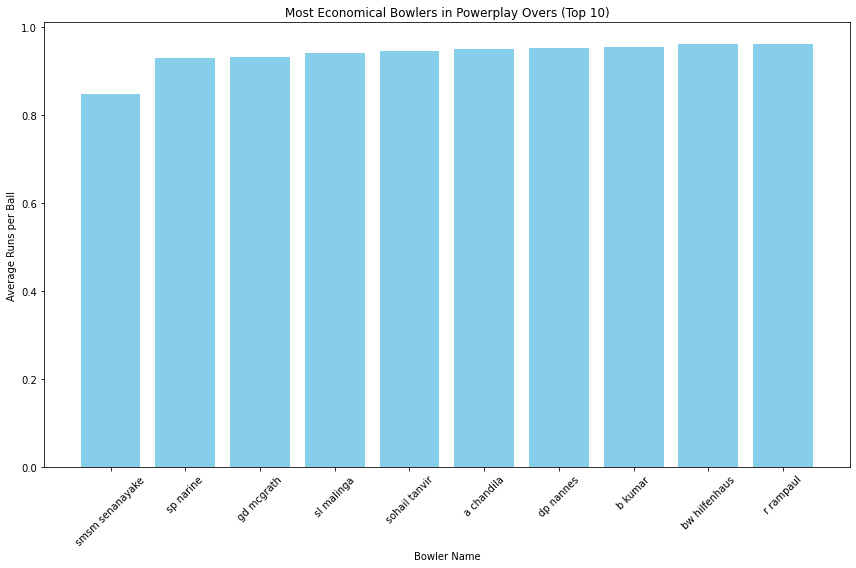

In [0]:
# Assuming 'economical_bowlers_powerplay' is already executed and available as a Spark DataFrame
economical_bowlers_pd = economical_bowlers_powerplay.toPandas()

# Visualizing using Matplotlib
plt.figure(figsize=(12, 8))
# Limiting to top 10 for clarity in the plot
top_economical_bowlers = economical_bowlers_pd.nsmallest(10, 'avg_runs_per_ball')
plt.bar(top_economical_bowlers['player_name'], top_economical_bowlers['avg_runs_per_ball'], color='skyblue')
plt.xlabel('Bowler Name')
plt.ylabel('Average Runs per Ball')
plt.title('Most Economical Bowlers in Powerplay Overs (Top 10)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

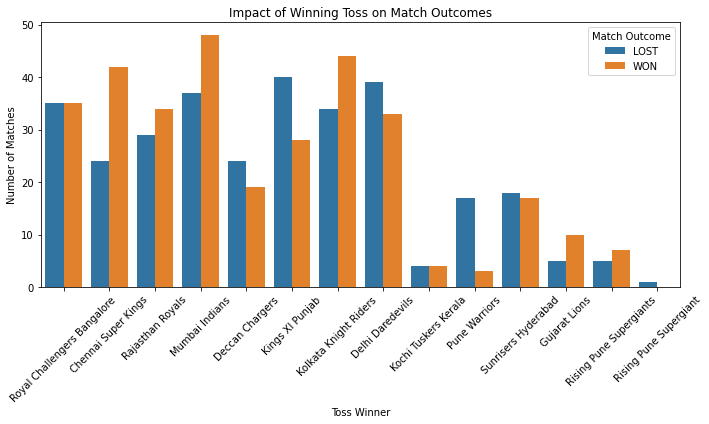

In [0]:
import seaborn as sns

toss_impact_pd = toss_impact.toPandas()

# Creating a countplot to show win/loss after winning toss
plt.figure(figsize=(10, 6))
sns.countplot(x='toss_winner', hue='match_outcome', data=toss_impact_pd)
plt.title('Impact of Winning Toss on Match Outcomes')
plt.xlabel('Toss Winner')
plt.ylabel('Number of Matches')
plt.legend(title='Match Outcome')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

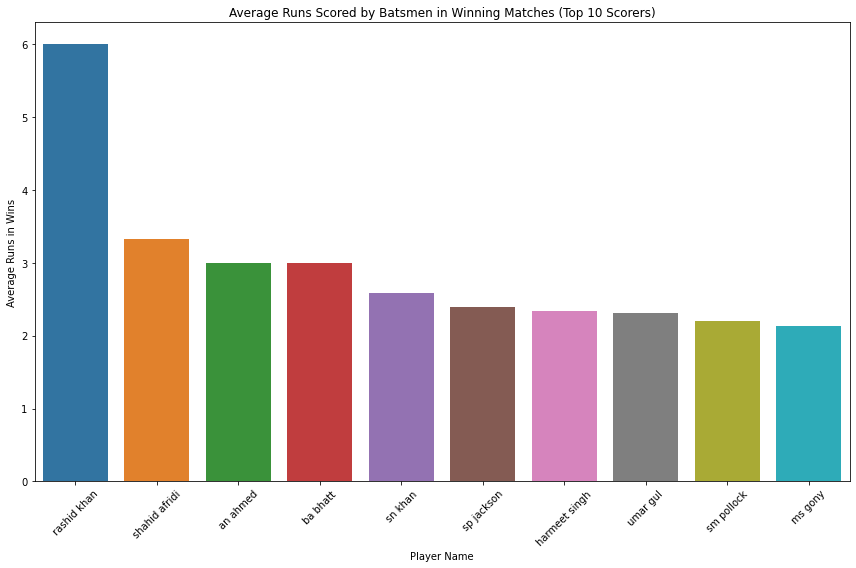

In [0]:
average_runs_pd = avg_runs_in_wins.toPandas()

# Using seaborn to plot average runs in winning matches
plt.figure(figsize=(12, 8))
top_scorers = average_runs_pd.nlargest(10, 'avg_runs_in_wins')
sns.barplot(x='player_name', y='avg_runs_in_wins', data=top_scorers)
plt.title('Average Runs Scored by Batsmen in Winning Matches (Top 10 Scorers)')
plt.xlabel('Player Name')
plt.ylabel('Average Runs in Wins')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [0]:
# Execute SQL Query
scores_by_venue = spark.sql("""
SELECT venue_name, AVG(total_runs) AS average_score, MAX(total_runs) AS highest_score
FROM (
    SELECT ball_by_ball.match_id, match.venue_name, SUM(runs_scored) AS total_runs
    FROM ball_by_ball
    JOIN match ON ball_by_ball.match_id = match.match_id
    GROUP BY ball_by_ball.match_id, match.venue_name
)
GROUP BY venue_name
ORDER BY average_score DESC
""")
     

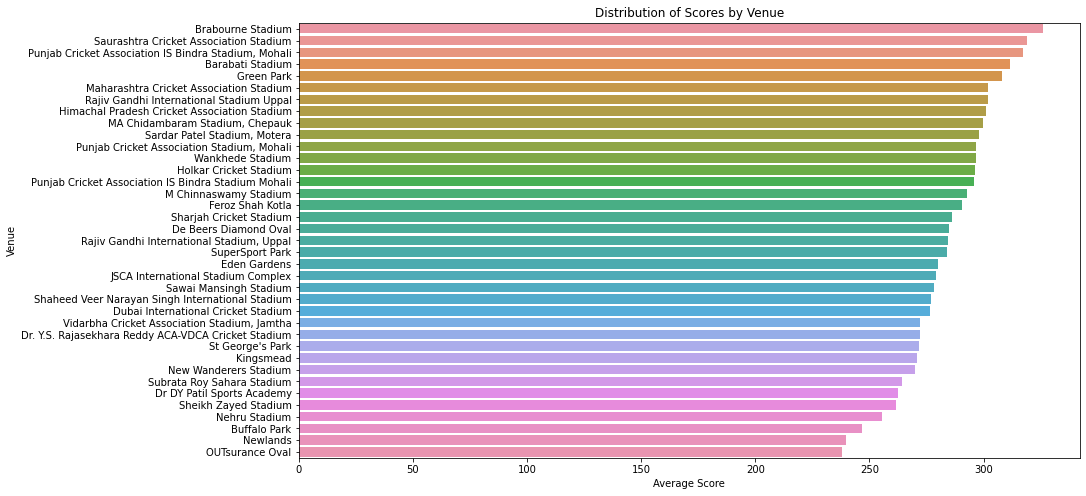

In [0]:
# Convert to Pandas DataFrame
scores_by_venue_pd = scores_by_venue.toPandas()

# Plot
plt.figure(figsize=(14, 8))
sns.barplot(x='average_score', y='venue_name', data=scores_by_venue_pd)
plt.title('Distribution of Scores by Venue')
plt.xlabel('Average Score')
plt.ylabel('Venue')
plt.show()

In [0]:
# Execute SQL Query
dismissal_types = spark.sql("""
SELECT out_type, COUNT(*) AS frequency
FROM ball_by_ball
WHERE out_type IS NOT NULL
GROUP BY out_type
ORDER BY frequency DESC
""")

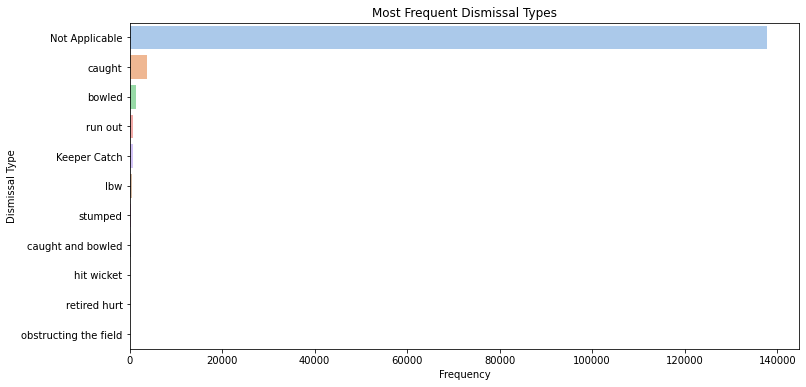

In [0]:
# Convert to Pandas DataFrame
dismissal_types_pd = dismissal_types.toPandas()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='out_type', data=dismissal_types_pd, palette='pastel')
plt.title('Most Frequent Dismissal Types')
plt.xlabel('Frequency')
plt.ylabel('Dismissal Type')
plt.show()

In [0]:

# Execute SQL Query
team_toss_win_performance = spark.sql("""
SELECT team1, COUNT(*) AS matches_played, SUM(CASE WHEN toss_winner = match_winner THEN 1 ELSE 0 END) AS wins_after_toss
FROM match
WHERE toss_winner = team1
GROUP BY team1
ORDER BY wins_after_toss DESC
""")

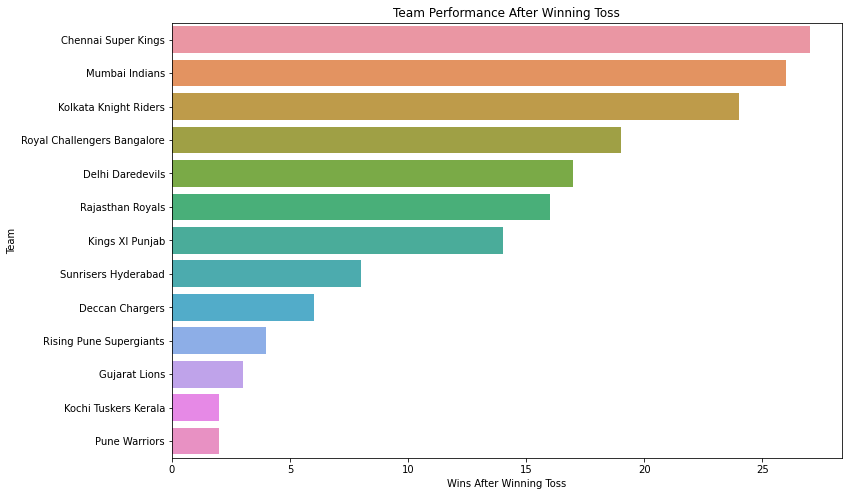

In [0]:
# Convert to Pandas DataFrame
team_toss_win_pd = team_toss_win_performance.toPandas()

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='wins_after_toss', y='team1', data=team_toss_win_pd)
plt.title('Team Performance After Winning Toss')
plt.xlabel('Wins After Winning Toss')
plt.ylabel('Team')
plt.show()
     